# 线性回归 手写

## 导入所需要的包

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## 读取数据集并进行划分

In [7]:
import random
def divideList(f1Name,f2Name,f3Name):
    #n1=random.randint(0,9)
    #n2=random.randint(0,9)
    #while n1==n2:
        #n2=random.randint(0,9)
    n1,n2=8,9
    origin=open(f1Name,'r')
    trainList=open(f2Name,'w')
    testList=open(f3Name,'w')
    totalNum,trainNum,testNum=0,0,0
    line=origin.readline()
    while line:
        totalNum+=1
        if totalNum%10==n1 or totalNum%10==n2:
            testNum+=1
            testList.write(line)
        else:
            trainNum+=1
            trainList.write(line)
        line=origin.readline()
    origin.close()
    trainList.close()
    testList.close()
    print("划分完成")
    print(totalNum,testNum,trainNum)
    return totalNum,testNum,trainNum
        
divideList("D:\A_University\Study\机器学习\实验一 线性模型-实验\实验一 线性模型 数据集\housing-data.csv","train_house.list","test_house.list")

划分完成
506 100 406


(506, 100, 406)

## 定义预测函数与损失函数

In [3]:
#最小二乘,损失函数为平方和损失函数，代价函数为样本的损失函数之和（残差平方和）
#读取训练集建立矩阵
def createMatrix(n:int):
    trainList=open('train_house.list','r')
    line=trainList.readline()
    tempMatrix=[]
    tempMatrixY=[]
    while line:
        #print(line)
        lineList=line.split()
        #print(lineList)
        numLineList=[]
        numLineList.append(1)
        for i in range(n):
            numLineList.append(float(lineList[i]))
        tempMatrixY.append(float(lineList[n]))
        tempMatrix.append(numLineList[:])
        line=trainList.readline()
    Matrix=np.array(tempMatrix)
    MatrixY=[]
    MatrixY.append(tempMatrixY)
    MatrixY=np.array(MatrixY)
    MatrixY=MatrixY.transpose()
    trainList.close()
    return Matrix,MatrixY
Matrix,MatrixY=createMatrix(13)
#print(Matrix)
#print(MatrixY)
print(Matrix.shape,MatrixY.shape)
print("matrix prepared")

(406, 14) (406, 1)
matrix prepared


## 存储

In [8]:
#求出系数矩阵w并存储
def getModulus(X,Y):
    XT=X.transpose()
    w=np.matmul(np.matmul(np.linalg.inv(np.matmul(XT,X)),XT),Y)
    np.savetxt("house_module.csv",w,delimiter=',')
    return w
w=getModulus(Matrix,MatrixY)
print(w)

[[ 3.03260503e+01]
 [-1.06603210e-01]
 [ 5.33266355e-02]
 [ 1.95627446e-02]
 [ 3.12350801e+00]
 [-1.76209205e+01]
 [ 4.23819368e+00]
 [-1.62381880e-03]
 [-1.43234015e+00]
 [ 2.80944461e-01]
 [-1.15857591e-02]
 [-8.26448023e-01]
 [ 1.04721358e-02]
 [-4.98279620e-01]]


## 模型评估

In [9]:
#计算结果并算出均方差
def testModulus(w,n,trainNum):
    squareSum=0
    w=w.transpose()
    testList=open('test_house.list','r')
    line=testList.readline()
    result=[]
    while line:
        lineList=line.split()
        trueY=float(lineList[n])
        x=[]
        tx=[1]
        for i in range(n):
            tx.append(float(lineList[i]))
        x.append(tx)
        x=np.array(x).transpose()
        y=np.matmul(w,x).tolist()[0][0]
        #print(y)
        result.append(y)
        squareSum+=(trueY-y)*(trueY-y)
        line=testList.readline()
        MeanSquareError=squareSum/trainNum
    return result,MeanSquareError
result,MeanSquareError=testModulus(w,13,102)
print("结果")
print(result)
print("均方差")
print(MeanSquareError)

结果
[19.230639754715316, 11.256835615359188, 17.028868364729643, 15.958932966261179, 14.818448520293858, 19.812088882760452, 22.823165539490805, 22.733499212798357, 17.90603251497334, 9.013741662145339, 33.44433040010851, 21.912893886060694, 21.088181067422205, 17.372059985751353, 23.23054510053417, 21.250681301359606, 25.600830071600186, 30.56475655201793, 36.143443869556556, 35.43938607963793, 20.82791973838014, 22.82077721603875, 23.2848864772496, 19.946124592314423, 15.222799772861878, 19.251376566122968, 19.66230290720322, 14.028111111114303, 7.713063246069102, 8.962871120342346, 32.60234124223507, 28.023652103990596, 22.082383800820747, 25.587522922558104, 28.57094157471051, 31.094662648592525, 33.36216661720469, 32.24514732184633, 32.84765102448311, 34.94199184021854, 17.66527421532308, 23.789120789056913, 27.948732171223146, 24.82921972146062, 32.182842240741586, 35.55807970513463, 32.62452203181156, 28.33847811651492, 19.958078010012798, 21.514638438979766, 43.30485995636287, 3

## 逻辑回归 手写

## 缺省值处理

In [5]:
#由于存在缺项，所以进行数据清洗，并删除不需要的编号
def data_Wash(fileName:str):
    originFile=open(fileName,'r')
    dataAfterWash=open('dataAfterWash.txt','w')
    line=originFile.readline()
    numData,numLoseData=0,0
    while line:
        if '?' in line:
            numLoseData+=1
        else:
            index=line.find(',')
            line=line[index+1:]
            dataAfterWash.write(line)
            numData+=1
        line=originFile.readline()
    originFile.close()
    dataAfterWash.close()
    print(numData,numLoseData)
data_Wash('breast-cancer-wisconsin.data')

683 16


## 划分数据集

In [8]:
divideList('dataAfterWash.txt','cancerTrain.list','cancerTest.list')

划分完成
683 136 547


(683, 136, 547)

## 逻辑回归

[5.963701357054275, -1.8713671930762037, -2.1970458302291203, -2.1805435651659626, -1.5179412579220435, -0.8237262079624859, -3.2001096245625456, -1.4115810881402475, -1.8360851544711918, -0.7396805773402622]
训练时长
102.59360551834106


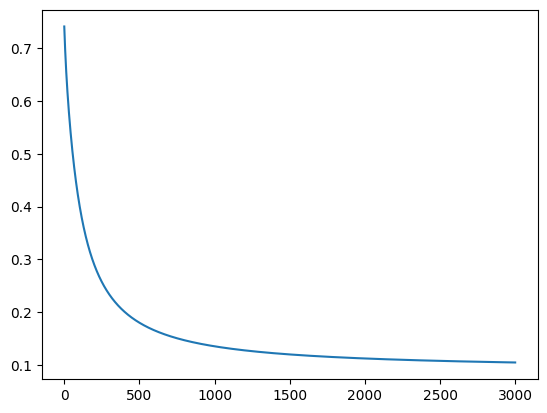

In [48]:
#建立模型，采用批量梯度下降BGD
import time
import math
def getModule2(learningRate=0.1,trainingRound=3000,file='cancerTrain.list',dimension=9,normalization=True)->str:
    time_start=time.time()
    #print("hello")
    #建立列表存储每行向量和结果，设2号种类发生概率为y
    Arrays=[]
    types=[]
    TrainFile=open(file,'r')
    line=TrainFile.readline()

    while line:
        #print(line)
        tempArray1,tempArray2=[],[1]
        Array=line.split(',')
        for i in range(dimension):
            element=float(Array[i])
            if normalization:
                element/=10
            tempArray2.append(element)
        types.append(float(Array[dimension]))
        tempArray1.append(tempArray2)
        #print(np.array(tempArray1).shape)
        Arrays.append(np.array(tempArray1))
        line=TrainFile.readline()
    TrainFile.close()
    w=[0.1]*(dimension+1)
    Loss=[]
    #损失函数为交叉熵
    for i in range(trainingRound):
        tw=w[:]
        #print(tw)
        #迭代w
        for j in range(dimension+1):
            tempSum=0
            for k in range(len(types)):
                yi=1 if types[k]==2 else 0
                #print(yi)
                #print(np.matmul(np.array([tw]),Arrays[k].T)[0][0])
                hx=1/(1+math.e**(-np.matmul(np.array([w]),Arrays[k].T)[0][0]))
                #print(hx)
                tempSum+=(hx-yi)*Arrays[k][0][j]
            w[j]-=learningRate*(1/len(types))*tempSum
        #计算每一轮的J(w)
        sumForJw=0
        for k in range(len(types)):
            yi=1 if types[k]==2 else 0
            hx=1/(1+math.e**(-np.matmul(np.array([w]),Arrays[k].T)[0][0]))
            sumForJw+=yi*math.log(hx)+(1-yi)*math.log(1-hx)
        Jw=-(1/len(types))*sumForJw
        Loss.append(Jw)
    print(w)
    #画出损失率的折线图
    #print(Loss)
    plt.plot([i for i in range(trainingRound)],Loss)
    with open("modulusOfQ2.txt",'w') as f:
        f.write(str(w))
    time_end=time.time()
    print("训练时长")
    print(time_end-time_start)
getModule2()

## 模型评估

In [64]:
#对测试集进行检验并判断误差（精度acc，查全率R，查准率p）
def testModulus2(normalization=True,dimension=9):
    TP,FN,FP,TN=0,0,0,0
    with open('modulusOfQ2.txt','r') as f:
        w=eval(f.readline())
    w=np.array([w])
    testFile=open('cancerTest.list','r')
    line=testFile.readline()
    num=0
    while line:
        num+=1
        lineList=line.split(',')
        x=[1]
        for i in range(dimension):
            element=float(lineList[i])
            if normalization:
                element/=10
            x.append(element)
        y=int(lineList[dimension])
        x=np.array([x])
        possible=1/(1+math.e**(-np.matmul(w,x.T)))
        ty=2 if possible>=0.5 else 4
        if ty==2 and y==2:
            TP+=1
        elif y==2 and ty==4:
            FN+=1
        elif y==4 and ty==2:
            FP+=1
        else:
            TN+=1
        line=testFile.readline()
    acc=(TP+TN)/float(num)
    p=float(TP)/(TP+FP)
    R=float(TP)/(TP+FN)
    print(TP,FN,FP,TN)
    print(acc,p,R)
    testFile.close()
testModulus2()

93 1 1 41
0.9852941176470589 0.9893617021276596 0.9893617021276596
